In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
Base_dados= pd.read_csv('Startups+in+2021+end.csv' , sep=',')

Base_dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [34]:
Base_dados.rename(columns ={

    'Unnamed: 0'        : 'Id'             ,
    'Company'           : 'Empresas'       , 
    'Valuation ($B)'    : 'Valor ($B)'     ,
    'Date Joined'       : 'Data de Inicio' , 
    'Country'           : 'País'           ,
    'City'              : 'Cidade'         ,
    'Industry'          : 'Industria'      ,
    'Select Investors'  : 'Investidores'   ,

    }
)

,Id,Empresas,Valor ($B),Data de Inicio,País,Cidade,Industria,Investidores,Month,Year
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018
...,...,...,...,...,...,...,...,...,...,...
931,931,YipitData,$1,2021-12-06,United States,New York,Internet software & services,"RRE Ventures+, Highland Capital Partners, The ...",12,2021
932,932,Anyscale,$1,2021-12-07,United States,Berkeley,Artificial Intelligence,"Andreessen Horowitz, Intel Capital, Foundation...",12,2021
933,933,Iodine Software,$1,2021-12-01,United States,Austin,Data management & analytics,"Advent International, Bain Capital Ventures, S...",12,2021
934,934,ReliaQuest,$1,2021-12-01,United States,Tampa,Cybersecurity,"KKR, FTV Capital, Ten Eleven Ventures",12,2021


<Axes: title={'center': 'Analisando Campos Nulos'}>

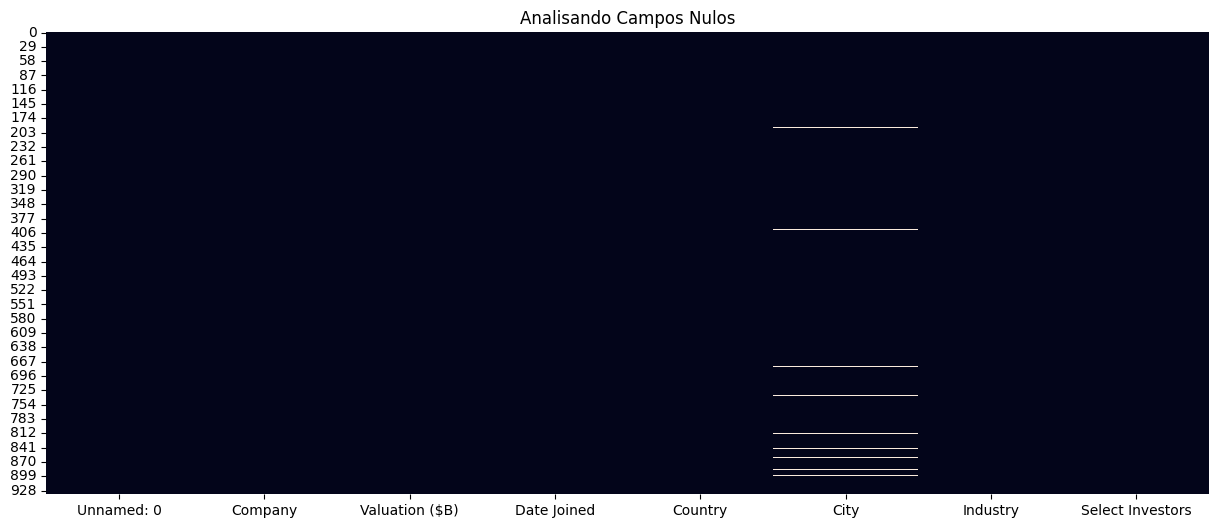

In [12]:
# Grafica
plt.figure( figsize=(15,6) )
plt.title('Analisando Campos Nulos')
sns.heatmap( Base_dados.isnull(), cbar=False )

In [4]:
Base_dados.duplicated().sum()

Base_dados.isnull().sum()

Unnamed: 0           0
Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                15
Industry             0
Select Investors     1
dtype: int64

In [18]:
# Campos unicos
Base_dados.nunique()

# Valores Unicos
Base_dados['Industry'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [19]:
# Valores Unicos - Rank
Base_dados['Industry'].value_counts()

Industry
Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: count, dtype: int64

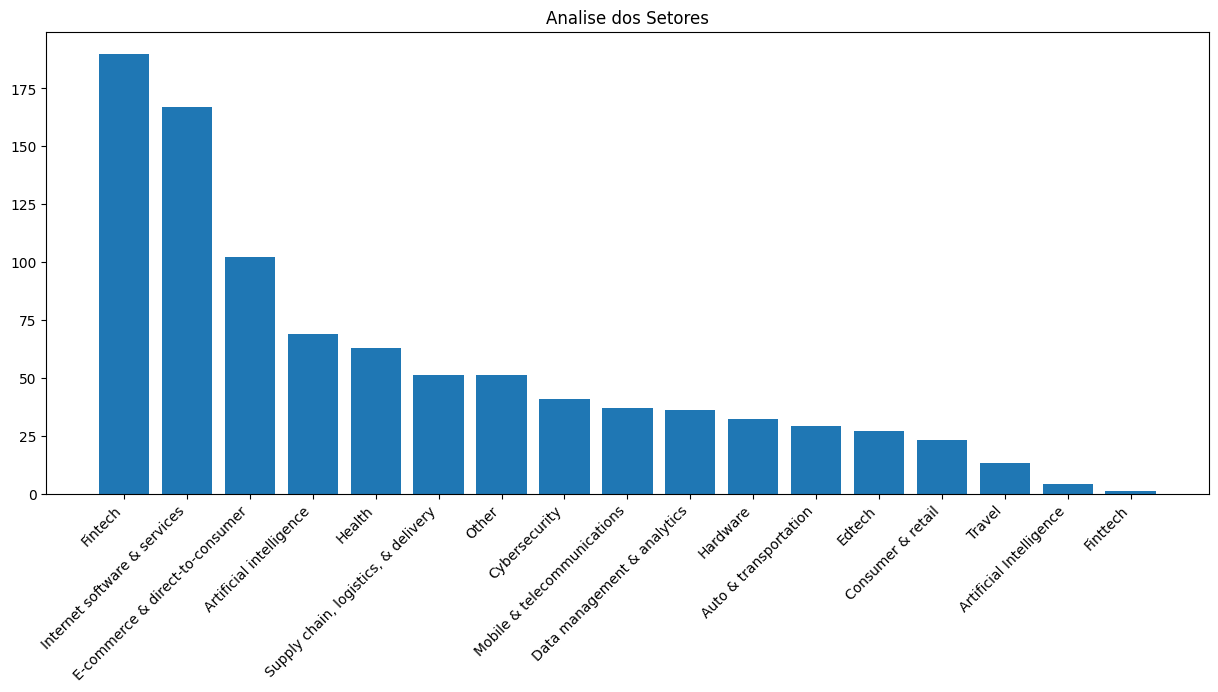

In [20]:
plt.figure( figsize=(15,6) )
plt.title('Analise dos Setores')
plt.bar( Base_dados['Industry'].value_counts().index, Base_dados['Industry'].value_counts()  )
plt.xticks( rotation=45, ha='right' );

In [22]:
Analise = round( Base_dados['Country'].value_counts( normalize=True ) * 100, 1 )

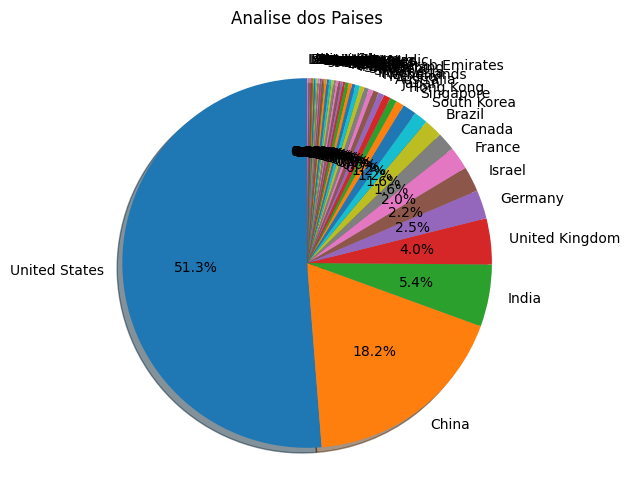

In [24]:
# Plot geral dos Paises
plt.figure( figsize=(15,6) )
plt.title('Analise dos Paises')
plt.pie(
    Analise,
    labels = Analise.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

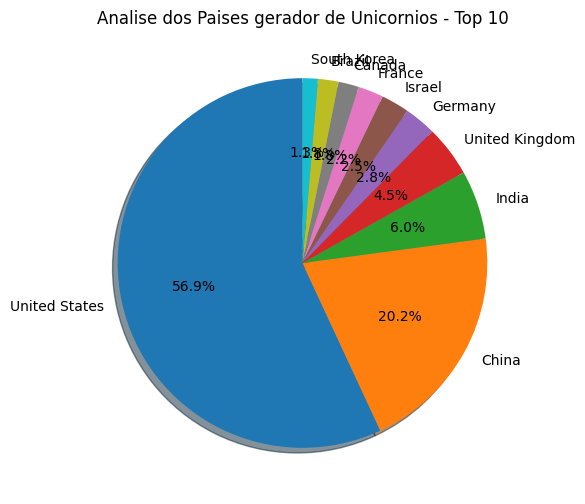

In [25]:
# Plot geral dos Paises
plt.figure( figsize=(15,6) )
plt.title('Analise dos Paises gerador de Unicornios - Top 10')
plt.pie(
    Analise.head(10),
    labels = Analise.index[0:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [29]:
# Conversão para Data
Base_dados['Date Joined'] = pd.to_datetime( Base_dados['Date Joined'] )

Base_dados['Date Joined'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Date Joined, dtype: datetime64[ns]

In [30]:
# Extrair o Ano e Mes
Base_dados['Month'] = pd.DatetimeIndex( Base_dados['Date Joined'] ).month
Base_dados['Year'] = pd.DatetimeIndex( Base_dados['Date Joined'] ).year

Base_dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [35]:
# Tabela Analitica
Analise_Agrupada = Base_dados.groupby( by=['Country', 'Year', 'Month', 'Company'] ).count()['Unnamed: 0'].reset_index()

Analise_Agrupada

,Country,Year,Month,Company,Unnamed: 0
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [36]:
Analise_Agrupada.loc[
  Analise_Agrupada['Country'] == 'Brazil'
]

,Country,Year,Month,Company,Unnamed: 0
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [39]:
# Transformando a coluna Valor
Base_dados['Valuation ($B)'] = pd.to_numeric( Base_dados['Valuation ($B)'].apply( lambda Linha: Linha.replace('$', '') ) )

Base_dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018
